In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def mle_b(data):
    """Compute the OLS for multivariate autoregression

       Arguments:
            data  : time series format data
            
       Returns:
            coefficinets of the model
    """

    x_m = data[:-1].values

    A = np.linalg.pinv(x_m.T@x_m)@x_m.T@data[1:]

    A.index = A.columns

    return A

In [17]:
def leontief_inverse_node(adj_mat):
    """Get the Leontief inverse as centrality measure of the node

       Arguments:
            adj_mat: adjacency 3D array

       Returns:
            the Leontief inverse 3D array for adjacency matrix
    """

    leont = adj_mat.copy()
    #leont = adj_mat[:]
    for i in range(len(adj_mat)): # for each time window
        eig_mat = np.linalg.eig(adj_mat[i])[0]

        iden = np.identity(len(adj_mat[0])) # identity matrix - number of nodes' size
        dif = iden - adj_mat[i]

        a_inv = np.linalg.inv(dif)
        leont[i][:] = a_inv
    return leont

In [13]:
def leontief_inverse_system(leon_node):
    """Get the Leontief inverse as centrality measure of the system

       Arguments:
            leon_node: Leontief inverse centrality 3D array

       Returns:
            Leontief inverse 2D array of adjacency matrix
    """

    return np.sum(leon_node, axis=-1) - 1 # -1 to exclude the initial shock

In [16]:
def all_years_same_name(raw_data, lag):
    """Calculate adjacency matrix from the data

       Arguments:
            raw_data : return data
            lag      : number of lags considered in partial cor and conditional exp

       Returns:
            derived adjacency matrix from data
    """

    kx = 0
    lin_dict  = {}

    ret_cds_df_ = raw_data
    
    for ix in range(2005,2022): # each year
        ret_cds_df1 = ret_cds_df_.loc[f"{2005+kx}-01-01": f"{2005+kx}-12-31",:] # same names through years        
        rw = (len(ret_cds_df1)-lag)
        
        lin_mod = mle_b(ret_cds_df1)
            
        # model dict per year
        lin_dict[f"{2005+kx}-01-01", f"{2005+kx}-12-31"]  = lin_mod.to_numpy()
        kx += 1 # go to next year
    
    # final dict per model (per year embedded in model already)
    fin_dict = {}
    fin_dict["adj_linear"]  = lin_dict
    
    return fin_dict

In [7]:
def sys_boxplot(adj_dict, adj_type):
    """boxplot of system's leontief centrality

       Arguments:
            adj_dict : dictionary obtained from the all_years_same_name function
            adj_type : type of network

       Returns:
            boxplot per year
    """

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    for kx in range(2022-2005):
        leont_nt = leontief_inverse_node(np.array([adj_dict[adj_type][f"{2005+kx}-01-01", f"{2005+kx}-12-31"]]))
        leo_syst = leontief_inverse_system(leont_nt)
        
        ax.boxplot(leo_syst.tolist(), positions = [kx], widths = 0.6, showmeans=True)
    plt.xlabel("year")
    plt.ylabel("Leontief centrality")
    plt.title(f"System's Leontief centrality for {adj_type} network")
    plt.xticks(np.arange(0,17), np.arange(2005, 2022), rotation=45);

In [26]:
def ts_boxplot(ts_df):
    """boxplot of the time series

       Arguments:
            ts_df : original time series

       Returns:
            boxplot per year
    """

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    for kx in range(2022-2005):
        ts_mean = np.mean(ts_df.loc[f"{2005+kx}-01-01":f"{2005+kx}-12-31",:], axis = 0)
        
        ax.boxplot(ts_mean.tolist(), positions = [kx], widths = 0.6, showmeans=True)
    plt.xlabel("year")
    plt.ylabel("CDS spread")
    plt.title("Average CDS spread")
    plt.xticks(np.arange(0,17), np.arange(2005, 2022), rotation=45);

In [106]:
def read_data(file_name):
    """read the Markit data

       Arguments:
            file_name : file name on disk

       Returns:
            time series format data frame with columns as the tickers
    """

    os.chdir("/Users/stevensuser/Library/CloudStorage/OneDrive-stevens.edu/PhD_research/Qual/D + Z")
    cds_df = pd.read_csv(f"{file_name}.csv")
    cds_df.rename(columns={cds_df.columns[0]: "VALUE_DATE"}, inplace=True)
    cds_df.set_index("VALUE_DATE" , inplace = True)
    return cds_df

In [113]:
ret_cds_df_mar5 = read_data("ret5_fin")
ts_cds_df_mar5 = read_data("ts5_fin")

ret_cds_df_mar1 = read_data("ret1_fin")
ts_cds_df_mar1 = read_data("ts1_fin")

In [118]:
adj_mar5 = all_years_same_name(raw_data = ret_cds_df_mar5, lag = 1)
adj_mar1 = all_years_same_name(raw_data = ret_cds_df_mar1, lag = 1)

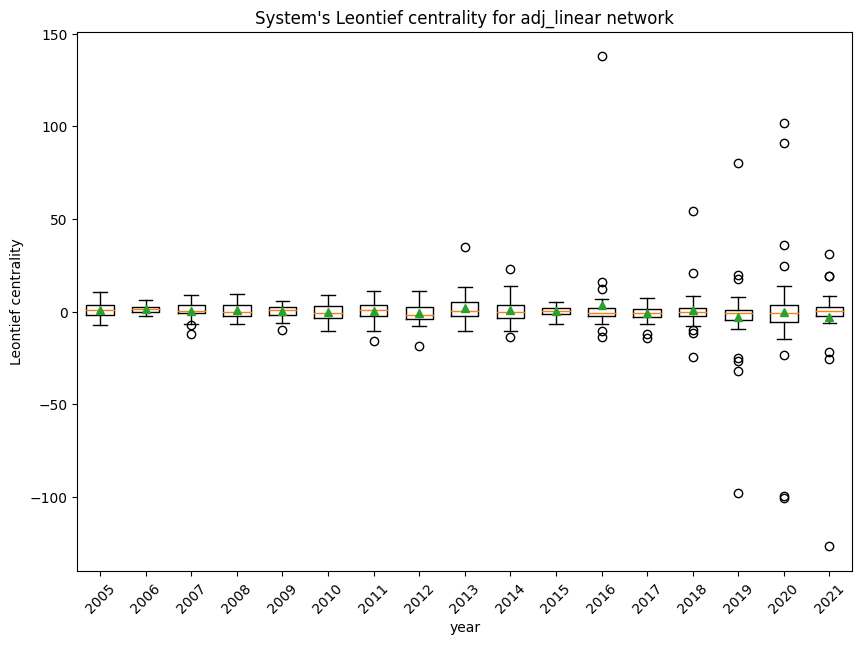

In [119]:
sys_boxplot(adj_mar5, "adj_linear")

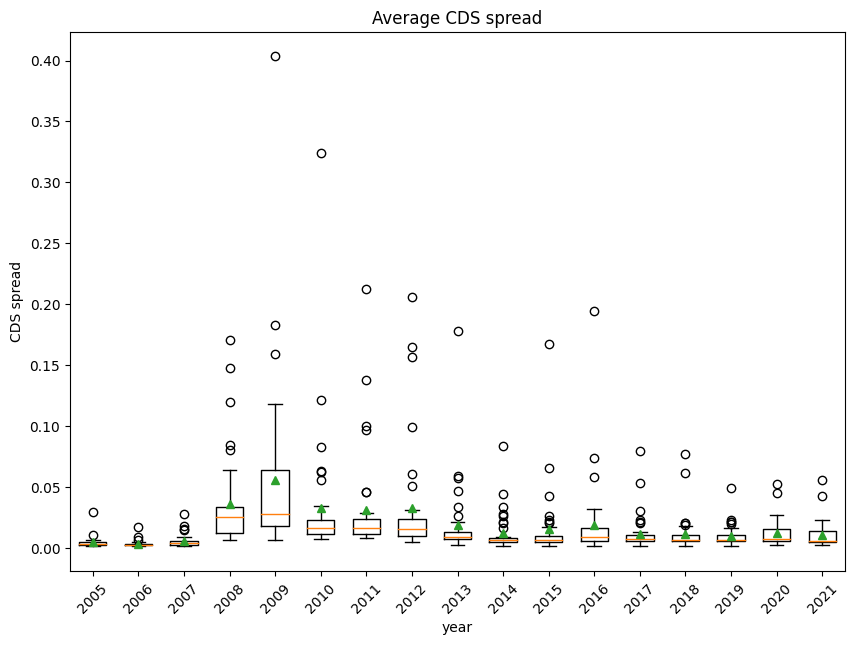

In [120]:
ts_boxplot(ts_cds_df_mar5)

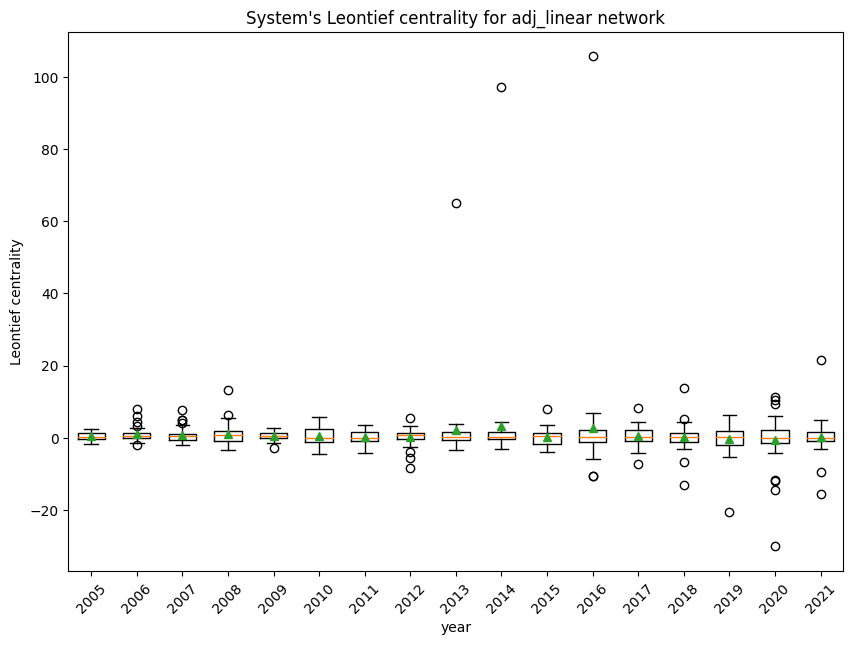

In [121]:
sys_boxplot(adj_mar1, "adj_linear")

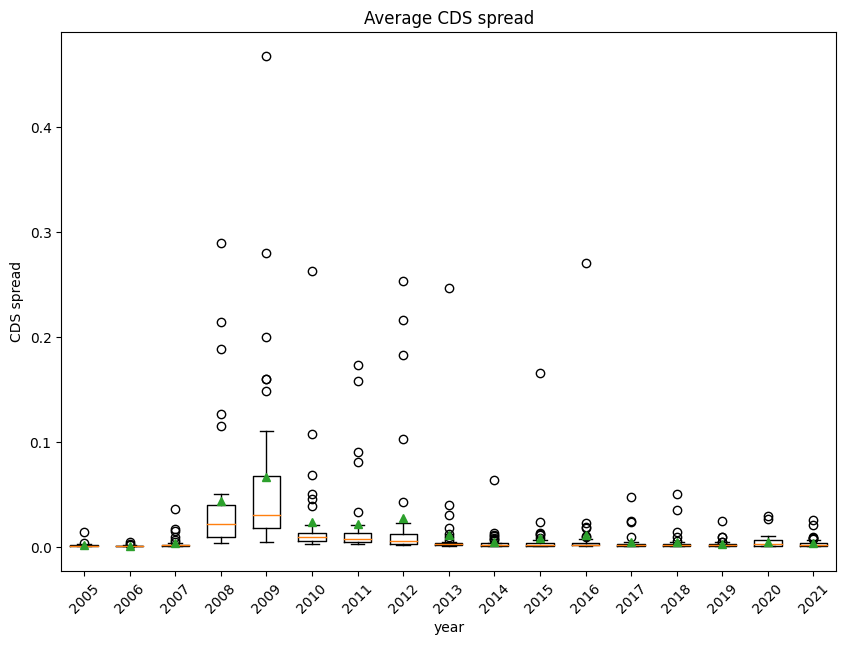

In [122]:
ts_boxplot(ts_cds_df_mar1)

/var/folders/16/xjbnlk2n2p92pppkpthr013r0000gp/T/ipykernel_31488/2151538204.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(aa, ignore_index=True)
/var/folders/16/xjbnlk2n2p92pppkpthr013r0000gp/T/ipykernel_31488/2151538204.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(bb,ignore_index=True)
/var/folders/16/xjbnlk2n2p92pppkpthr013r0000gp/T/ipykernel_31488/2151538204.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(aa, ignore_index=True)
/var/folders/16/xjbnlk2n2p92pppkpthr013r0000gp/T/ipykernel_31488/2151538204.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(bb,ignor

            0  date      dataset
0    2.407793     0   centrality
1    4.864351     0   centrality
2   -3.453231     0   centrality
3    0.416092     0   centrality
4    3.472400     0   centrality
..        ...   ...          ...
607  0.007375    16  time series
608  0.007361    16  time series
609  0.002622    16  time series
610  0.012952    16  time series
611  0.005113    16  time series

[1224 rows x 3 columns]


<AxesSubplot:xlabel='date', ylabel='val'>

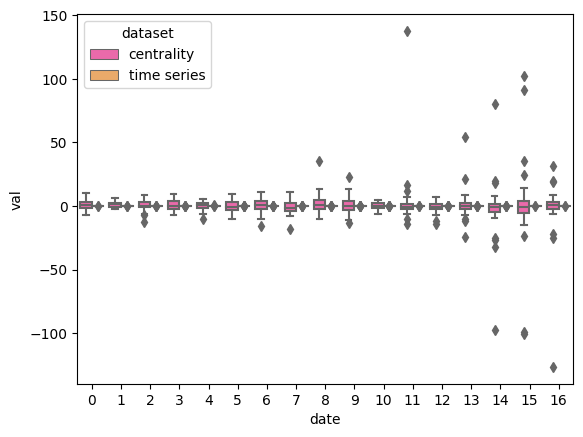

In [101]:
# this is not quite right
for kx in range(2022-2005):
    leont_nt = leontief_inverse_node(np.array([adj_mar["adj_linear"][f"{2005+kx}-01-01", f"{2005+kx}-12-31"]]))
    leo_syst = leontief_inverse_system(leont_nt)
    aa = pd.DataFrame(leo_syst.T)

    ts_mean = np.mean(ts_cds_df_mar.loc[f"{2005+kx}-01-01":f"{2005+kx}-12-31",:], axis = 0)
    bb = pd.DataFrame(ts_mean.T).reset_index(drop=True)

    aa["date"] = kx
    bb["date"] = kx

    if kx==0:
        a = aa.copy()
        b = bb.copy()
    else:
        a = a.append(aa, ignore_index=True)
        b = b.append(bb,ignore_index=True)

#    print(a)
#    print(b)  

a["dataset"] = "centrality"
b["dataset"] = "time series"

df = pd.concat([a, b])
df.rename(columns={0:'val'}, inplace=True)

sns.boxplot(data=df, x='date', y='val', hue='dataset', palette='spring')